In [24]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [25]:
# file path
file_path = "~/buckets/b1/exp/HT4220B/HT4220.txt"

In [26]:
# load data
df = pl.read_csv(file_path, separator='\t', ignore_errors=True)
df.head()

FileNotFoundError: No such file or directory (os error 2): /home/luviola/buckets/b1/exp/HT4220B/HT4220.txt

In [14]:
# convert 'fecha' to datetime
df = df.with_columns(pl.col('fecha').str.strptime(pl.Datetime, "%Y%m%d %H%M%S"))
df.head()

fecha,objective,metric,first_metric_only,boost_from_average,feature_pre_filter,verbosity,max_bin,num_iterations,force_row_wise,seed,learning_rate,num_leaves,feature_fraction,min_data_in_leaf,envios,max_depth,lambda_l1,lambda_l2,bagging_fraction,bagging_freq,min_child_samples,max_bin_duplicated_0,subsample,colsample_bytree,min_gain_to_split,ganancia,iteracion
datetime[μs],str,str,bool,bool,bool,i64,i64,i64,bool,i64,f64,i64,f64,i64,i64,i64,f64,f64,f64,i64,i64,i64,f64,f64,f64,i64,i64
2024-09-22 23:01:56,"""binary""","""custom""",true,true,false,-100,31,53,true,173249,0.126923,588,0.520597,4535,8986,8,7.287244,2.748852,0.784852,7,40,796,0.745924,0.752385,5.808524,54045000,1
2024-09-22 23:02:13,"""binary""","""custom""",true,true,false,-100,31,43,true,173249,0.11625,644,0.713953,1672,9616,9,2.661112,5.873336,0.770334,0,48,787,0.708069,0.837346,5.059662,56715000,2
2024-09-22 23:02:36,"""binary""","""custom""",true,true,false,-100,31,73,true,173249,0.072471,415,0.607587,3603,9096,5,4.957563,6.631926,0.658035,3,93,649,0.736849,0.579175,13.245803,53595000,3
2024-09-22 23:02:54,"""binary""","""custom""",true,true,false,-100,31,50,true,173249,0.210004,707,0.56631,3072,11646,5,3.430616,3.987004,0.733004,5,70,524,0.73229,0.712016,4.794687,54705000,4
2024-09-22 23:05:11,"""binary""","""custom""",true,true,false,-100,31,780,true,173249,0.030126,573,0.246964,3524,12436,6,2.078466,5.476394,0.678646,8,62,712,0.760263,0.764041,0.810399,58455000,5


In [15]:
# calculate runtime
runtime = round((df['fecha'].max() - df['fecha'].min()).total_seconds()/60/60,2)
runtime

12.07

In [16]:
# sort by 'ganancia' in descending order
df_sorted = df.sort('ganancia', descending=True).filter(pl.col('ganancia').is_not_null())
df_sorted.head()

fecha,objective,metric,first_metric_only,boost_from_average,feature_pre_filter,verbosity,max_bin,num_iterations,force_row_wise,seed,learning_rate,num_leaves,feature_fraction,min_data_in_leaf,envios,max_depth,lambda_l1,lambda_l2,bagging_fraction,bagging_freq,min_child_samples,max_bin_duplicated_0,subsample,colsample_bytree,min_gain_to_split,ganancia,iteracion
datetime[μs],str,str,bool,bool,bool,i64,i64,i64,bool,i64,f64,i64,f64,i64,i64,i64,f64,f64,f64,i64,i64,i64,f64,f64,f64,i64,i64
2024-09-22 23:54:57,"""binary""","""custom""",true,true,false,-100,31,916,true,173249,0.034039,604,0.509488,351,10781,7,2.13045,3.725941,0.940852,10,83,991,0.92576,0.539038,0.028021,63420000,69
2024-09-23 00:43:09,"""binary""","""custom""",true,true,false,-100,31,648,true,173249,0.046566,660,0.495494,595,11153,7,1.777594,7.761112,0.80457,0,32,441,0.765754,0.96807,0.003157,62910000,95
2024-09-23 06:08:38,"""binary""","""custom""",true,true,false,-100,31,1650,true,173249,0.011206,991,0.995363,883,13206,10,0.193911,0.161053,0.662384,3,77,431,0.579052,0.949467,0.000086,62745000,179
2024-09-23 01:44:37,"""binary""","""custom""",true,true,false,-100,31,721,true,173249,0.028366,805,0.385997,212,11377,8,2.062048,7.395259,0.784424,7,68,260,0.967134,0.894606,0.098413,62595000,134
2024-09-23 01:47:20,"""binary""","""custom""",true,true,false,-100,31,634,true,173249,0.03413,686,0.360817,109,11201,8,2.521431,4.622732,0.713847,7,61,448,0.881002,0.959492,0.043064,62520000,135


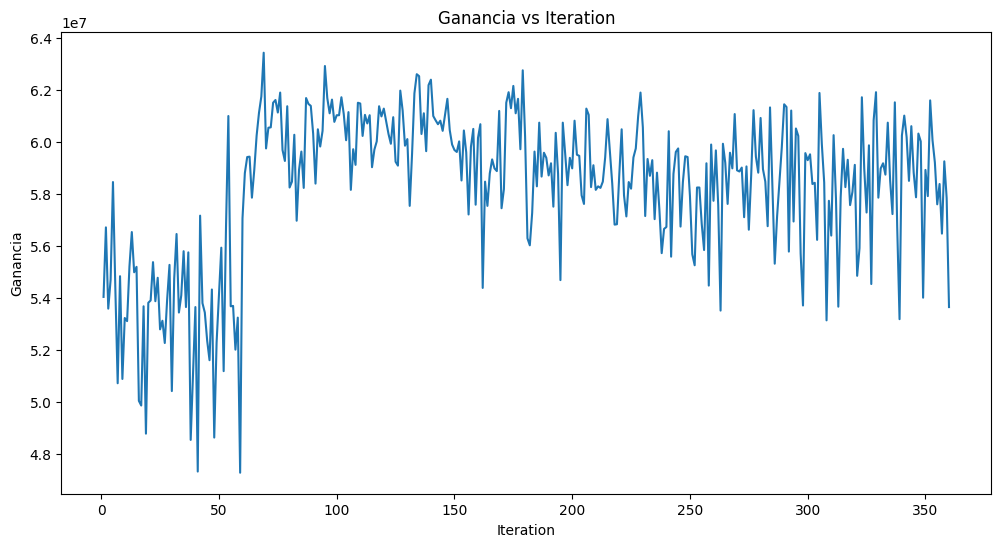

In [17]:
# plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['iteracion'], y=df['ganancia'])
plt.title('Ganancia vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('Ganancia')
plt.show()

In [18]:
# Find the row with the best ganancia
best_params = df_sorted.head(1).tail(1)
best_params

fecha,objective,metric,first_metric_only,boost_from_average,feature_pre_filter,verbosity,max_bin,num_iterations,force_row_wise,seed,learning_rate,num_leaves,feature_fraction,min_data_in_leaf,envios,max_depth,lambda_l1,lambda_l2,bagging_fraction,bagging_freq,min_child_samples,max_bin_duplicated_0,subsample,colsample_bytree,min_gain_to_split,ganancia,iteracion
datetime[μs],str,str,bool,bool,bool,i64,i64,i64,bool,i64,f64,i64,f64,i64,i64,i64,f64,f64,f64,i64,i64,i64,f64,f64,f64,i64,i64
2024-09-23 00:43:09,"""binary""","""custom""",true,true,false,-100,31,648,true,173249,0.046566,660,0.495494,595,11153,7,1.777594,7.761112,0.80457,0,32,441,0.765754,0.96807,0.003157,62910000,95


In [27]:
# List of all parameters we searched through
params = [
    'learning_rate', 'num_leaves', 'feature_fraction', 'min_data_in_leaf',
    'envios', 'max_depth', 'lambda_l1', 'lambda_l2', 'bagging_fraction',
    'bagging_freq', 'min_child_samples', 'max_bin', 'subsample',
    'colsample_bytree', 'min_gain_to_split', 'num_iterations'
]

# Generate R code for the best parameters
r_code = "# Best hyperparameters\n"
for param in params:
    if param in best_params.columns:
        value = best_params[param][0]
        if param == 'num_iterations':
            r_code += f"PARAM$finalmodel$num_boost_round <- {int(value)}\n"
        elif isinstance(value, float):
            r_code += f"PARAM$finalmodel${param} <- {value:.6f}\n"
        else:
            r_code += f"PARAM$finalmodel${param} <- {value}\n"
    else:
        r_code += f"# Warning: {param} not found in the results\n"

# Add a comment about num_iterations
r_code += "\n# Note: num_boost_round is used instead of num_iterations in LightGBM\n"

In [28]:
print(r_code)

# Best hyperparameters
PARAM$finalmodel$learning_rate <- 0.046566
PARAM$finalmodel$num_leaves <- 660
PARAM$finalmodel$feature_fraction <- 0.495494
PARAM$finalmodel$min_data_in_leaf <- 595
PARAM$finalmodel$envios <- 11153
PARAM$finalmodel$max_depth <- 7
PARAM$finalmodel$lambda_l1 <- 1.777594
PARAM$finalmodel$lambda_l2 <- 7.761112
PARAM$finalmodel$bagging_fraction <- 0.804570
PARAM$finalmodel$bagging_freq <- 0
PARAM$finalmodel$min_child_samples <- 32
PARAM$finalmodel$max_bin <- 31
PARAM$finalmodel$subsample <- 0.765754
PARAM$finalmodel$colsample_bytree <- 0.968070
PARAM$finalmodel$min_gain_to_split <- 0.003157
PARAM$finalmodel$num_boost_round <- 648

# Note: num_boost_round is used instead of num_iterations in LightGBM

